In [24]:
import pandas as pd
X_new = pd.read_csv('embedding_results/X_320_clean_LR.csv', delimiter=',',header = None,index_col= 0, skiprows=1)
#X_out = pd.read_csv('generalization_data/X_test_nr_320.csv',delimiter=',',header = None,index_col= 0, skiprows=1)
#X_out_Sequence = pd.read_csv('generalization_data/X_test_nr.csv',delimiter=',',header = None,index_col= 0, dtype={0: int},skiprows=1)
# load numpy array from csv file
from numpy import loadtxt
import numpy as np
# load array
y_new = loadtxt('embedding_results/y_whole_clean_ACE.csv', delimiter=',')



In [25]:
X_new.head()

,1,2,3,4,5,6,7,8,9,10,...,311,312,313,314,315,316,317,318,319,320
0,,,,,,,,,,,,,,,,,,,,,
0,0.139993,-0.435624,0.533432,0.245520,-0.037777,-0.205565,-0.174132,0.006184,-0.147792,-0.072895,...,0.188533,0.027038,-0.072476,-0.008486,-0.004960,0.064057,-0.081112,-0.069016,0.309268,0.055681
1,-0.017159,-0.274750,0.139635,0.226395,0.091277,-0.054095,-0.197418,-0.121457,-0.167074,-0.133363,...,0.266903,0.042168,0.221770,0.223856,-0.075128,0.288996,0.195563,0.168286,0.241382,0.130343
3,0.081766,-0.434443,0.517479,0.393442,-0.139180,-0.236886,-0.208077,0.020925,-0.149324,-0.134162,...,-0.059169,0.134012,0.071508,0.094889,0.037986,0.362630,0.021677,0.007231,0.223266,0.109919
5,0.046700,-0.324264,0.292027,0.163590,-0.017439,-0.094095,-0.126638,-0.081752,-0.165306,-0.072302,...,0.203659,-0.086773,0.235853,0.144662,-0.110621,0.074933,0.060307,0.075304,0.219589,0.072603
6,0.098760,-0.232188,0.205257,0.144129,-0.021316,0.049918,-0.277318,-0.154654,-0.208609,-0.151379,...,0.074428,0.049859,0.178146,-0.044487,-0.079229,0.000859,-0.003936,0.048288,0.290824,0.020416


In [26]:
#X_out

In [27]:
#X_out_Sequence

In [28]:
y_new

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
print(X_new.shape)
print(y_new.shape)
print(np.count_nonzero(y_new==0))
print(np.count_nonzero(y_new==1))

(339, 320)
(339,)
178
161


In [30]:
import statistics
from sklearn.metrics import balanced_accuracy_score
from self_function import evaluation as eva

In [31]:
# dataset splitting 
from sklearn.model_selection import train_test_split
X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [9]:
# logistic regresion l2 penality and class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(class_weight='balanced',penalty= 'l2', solver= 'saga', max_iter = 5000)
param_grid = {'C':[0.5,1,1.5,2,2.5,4,6,8,13,14,15,16,20,30,40, 50,60,70, 80, 90 ,100,125]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
#y_pred = best_model_reg.predict(X_out)



#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))

#model performance evaluation:BACC & recall & accuracy & MCC & f1 score& roc_auc
evaluation = eva(best_model_reg,X_ind_test,y_ind_test)
print(evaluation)



# get the probability of class 1
#y_pred_prob = best_model_reg.predict_proba(X_out)[:, 1]

# 根据排序后的索引获取预测结果和概率
#sorted_indices = np.argsort(y_pred_prob)[::-1]
#sorted_y_pred = y_pred[sorted_indices]
#sorted_prob = y_pred_prob[sorted_indices]

#sorted_sequence = X_out_Sequence.iloc[sorted_indices]

# 将预测结果为0的序列移到最后
#zero_indices = np.where(sorted_y_pred == 0)[0]
#non_zero_indices = np.where(sorted_y_pred != 0)[0]
#sorted_sequence = pd.concat([sorted_sequence.iloc[non_zero_indices], sorted_sequence.iloc[zero_indices]])
#sorted_y_pred = np.concatenate((sorted_y_pred[non_zero_indices], sorted_y_pred[zero_indices]))
#sorted_prob = np.concatenate((sorted_prob[non_zero_indices], sorted_prob[zero_indices]))

# 输出结果
#output = np.column_stack((sorted_sequence, sorted_y_pred, sorted_prob))

#print("Sorted Sequence, Predictions, and Probabilities:")
#for item in output:
    #if item[2] == 0:
        #print(item[0], item[1], item[2],'-')
    #else:
        #print(item[0], item[1], item[2],item[3])


About model development
Best Parameters:{'C': 30}
Best cross_validation socre:0.959
Test set score:0.94
Best_estimator:
LogisticRegression(C=30, class_weight='balanced', max_iter=5000, solver='saga')
BACC =  0.903 ± 0.09
Recall =  0.896 ± 0.138
Precision =  0.922 ± 0.104
MCC =  0.822 ± 0.172
F1 score =  0.902 ± 0.099
ROC_AUC =  0.982 ± 0.031
LogisticRegression(C=30, class_weight='balanced', max_iter=5000, solver='saga')


In [27]:
# logistic regresion without penality and solver
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(max_iter = 5000)
param_grid = {'C':[0.5,1,1.5,2,2.5,4,6,8,13,14,15,16,20,30,40, 50,60,70, 80, 90 ,100,125, 500, 1000,2000,4000,10000]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_

#model performance evaluation:BACC & recall & accuracy & MCC & f1 score& roc_auc

evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)

#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))




BACC =  0.678 ± 0.059
Recall =  0.669 ± 0.096
Precision =  0.654 ± 0.079
MCC =  0.356 ± 0.118
F1 score =  0.659 ± 0.073
ROC_AUC =  0.759 ± 0.067
LogisticRegression(C=14, max_iter=5000)
About model development
Best Parameters:{'C': 14}
Best cross_validation socre:0.711
Test set score:0.86
Best_estimator:
LogisticRegression(C=14, max_iter=5000)


In [10]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators': [80, 160, 320, 480, 640, 1280,2000],
            'max_depth': [1, 2, 3, 4,5],
            'max_features' :['log2', 'sqrt']}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
#y_pred = best_model_reg.predict(X_out)
#评价 准确率 recall 精确率 rocauc f1 mcc

evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)

#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))


BACC =  0.94 ± 0.026
Recall =  0.917 ± 0.043
Precision =  0.965 ± 0.02
MCC =  0.878 ± 0.052
F1 score =  0.94 ± 0.028
ROC_AUC =  0.985 ± 0.01
RandomForestClassifier(max_depth=5, n_estimators=160, n_jobs=-1)
About model development
Best Parameters:{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 160}
Best cross_validation socre:0.937
Test set score:0.99
Best_estimator:
RandomForestClassifier(max_depth=5, n_estimators=160, n_jobs=-1)


In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier(n_jobs=-1)
param_grid = {'n_neighbors' : [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43],'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
#y_pred = best_model_reg.predict(X_out)
#评价 准确率 recall 精确率 rocauc f1 mcc

evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)

#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))



BACC =  0.903 ± 0.036
Recall =  0.9 ± 0.043
Precision =  0.911 ± 0.042
MCC =  0.806 ± 0.074
F1 score =  0.905 ± 0.035
ROC_AUC =  0.966 ± 0.022
KNeighborsClassifier(leaf_size=10, n_jobs=-1, weights='distance')
About model development
Best Parameters:{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
Best cross_validation socre:0.933
Test set score:0.97
Best_estimator:
KNeighborsClassifier(leaf_size=10, n_jobs=-1, weights='distance')


In [32]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = {'C':[0.001, 0.01, 0.1,  0.5, 1.1, 1.3, 5, 10, 30, 50, 100, 300],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[1, 3, 5, 7, 9],'tol':[1e-5]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
#y_pred = best_model_reg.predict(X_out)
#评价 准确率 recall 精确率 rocauc f1 mcc

evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)

#save model
import pickle

# 指定模型保存的文件名
model_filename = 'svm.pkl'

# 保存模型到文件
with open(model_filename, 'wb') as file:
    pickle.dump(best_model_reg, file)

# 打印确认信息
print(f"Model saved to {model_filename}")
#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))



BACC =  0.963 ± 0.022
Recall =  0.976 ± 0.024
Precision =  0.951 ± 0.03
MCC =  0.927 ± 0.044
F1 score =  0.963 ± 0.022
ROC_AUC =  0.993 ± 0.008
SVC(C=10, degree=5, kernel='poly', tol=1e-05)
Model saved to svm.pkl
About model development
Best Parameters:{'C': 10, 'degree': 5, 'kernel': 'poly', 'tol': 1e-05}
Best cross_validation socre:0.971
Test set score:0.99
Best_estimator:
SVC(C=10, degree=5, kernel='poly', tol=1e-05)


In [14]:
# MLP one layer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(early_stopping= True,n_iter_no_change= 40, max_iter = 3000)
param_grid = {'hidden_layer_sizes':[1,2,3,4,6,8,12,16, 18, 20, 22, 24,26,28,32, 64, 128, 240, 320, 640,1280]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
y_pred = best_model_reg.predict(X_out)
#评价 准确率 recall 精确率 rocauc f1 mcc

evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)

#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))

# get the probability of class 1
y_pred_prob = best_model_reg.predict_proba(X_out)[:, 1]

# 根据排序后的索引获取预测结果和概率
sorted_indices = np.argsort(y_pred_prob)[::-1]
sorted_y_pred = y_pred[sorted_indices]
sorted_prob = y_pred_prob[sorted_indices]

sorted_sequence = X_out_Sequence.iloc[sorted_indices]

# 将预测结果为0的序列移到最后
zero_indices = np.where(sorted_y_pred == 0)[0]
non_zero_indices = np.where(sorted_y_pred != 0)[0]
sorted_sequence = pd.concat([sorted_sequence.iloc[non_zero_indices], sorted_sequence.iloc[zero_indices]])
sorted_y_pred = np.concatenate((sorted_y_pred[non_zero_indices], sorted_y_pred[zero_indices]))
sorted_prob = np.concatenate((sorted_prob[non_zero_indices], sorted_prob[zero_indices]))

# 输出结果
output = np.column_stack((sorted_sequence, sorted_y_pred, sorted_prob))

print("Sorted Sequence, Predictions, and Probabilities:")
for item in output:
    if item[2] == 0:
        print(item[0], item[1], item[2],'-')
    else:
        print(item[0], item[1], item[2],item[3])



BACC =  0.933 ± 0.018
Recall =  0.919 ± 0.027
Precision =  0.901 ± 0.056
MCC =  0.861 ± 0.04
F1 score =  0.909 ± 0.026
ROC_AUC =  0.984 ± 0.009
MLPClassifier(early_stopping=True, hidden_layer_sizes=1280, max_iter=3000,
              n_iter_no_change=40)
About model development
Best Parameters:{'hidden_layer_sizes': 1280}
Best cross_validation socre:0.936
Test set score:0.96
Best_estimator:
MLPClassifier(early_stopping=True, hidden_layer_sizes=1280, max_iter=3000,
              n_iter_no_change=40)
Sorted Sequence, Predictions, and Probabilities:
VHH 1 1.0 0.999994574516385
LLPHHADADY 1 1.0 0.9999424163413002
HLPLP 0 1.0 0.9995702071812892
VNPHDHQN 1 1.0 0.998234998369792
LVNPHDHQN 1 1.0 0.995128284806887
LQSGDALRVPSGTTYY 1 1.0 0.9908049435464016
VHHANEN 1 1.0 0.9513477274219413
AHK 1 1.0 0.9032310610404802
PLAQPA 0 1.0 0.8309744899965238
VLPIPQ 0 0.0 -
SVPQPK 0 0.0 -
LLNPT 0 0.0 -
EVPKA 0 0.0 -
VVKL 1 0.0 -
FSL 0 0.0 -
IVF 0 0.0 -


In [14]:
# MLP two layer
from sklearn.neural_network import MLPClassifier
import itertools

hidden_layers_1 = [12,24,32,64,128,256,320,640,1280]
hidden_layers_2 = [2,8,12,24,32,64,128,256]
combinations = list(itertools.product(hidden_layers_1, hidden_layers_2))
hidden_layers_in =  [(x, y) for x, y in combinations]

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(early_stopping= True,n_iter_no_change= 40, max_iter = 3000)
param_grid = {'hidden_layer_sizes':hidden_layers_in }
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_



#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))

#model performance evaluation:BACC & recall & accuracy & MCC & f1 score& roc_auc
evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)



About model development
Best Parameters:{'hidden_layer_sizes': (256, 8)}
Best cross_validation socre:0.929
Test set score:0.88
Best_estimator:
MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 8), max_iter=3000,
              n_iter_no_change=40)
BACC =  0.893 ± 0.043
Recall =  0.895 ± 0.091
Precision =  0.903 ± 0.069
MCC =  0.784 ± 0.091
F1 score =  0.895 ± 0.046
ROC_AUC =  0.963 ± 0.03
MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 8), max_iter=3000,
              n_iter_no_change=40)


In [13]:
# LightGBM
import lightgbm as lgb
import itertools
from sklearn.model_selection import GridSearchCV


clf = lgb.LGBMClassifier(boosting='gbdt', objective='binary',n_jobs=-1,verbose = -1)
param_grid = {'learning_rate':[0.001,0.01,0.1,0.2,0.5,1],
              'n_estimators':[40,80,160,320,640],
              'max_depth':[-1],
              'reg_lambda':[0]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train_whole,y_train_whole)
best_model_reg = grid_search.best_estimator_
#y_pred = best_model_reg.predict(X_out)


#print the model's parameters and validation score
print("About model development")
print("Best Parameters:{}".format(grid_search.best_params_))
print("Best cross_validation socre:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.2f}".format(grid_search.score(X_ind_test,y_ind_test)))
print("Best_estimator:\n{}".format(grid_search.best_estimator_))

#model performance evaluation:BACC & recall & accuracy & MCC & f1 score& roc_auc
evaluation = eva(best_model_reg,X_new,y_new)
print(evaluation)




About model development
Best Parameters:{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 80, 'reg_lambda': 0}
Best cross_validation socre:0.941
Test set score:0.94
Best_estimator:
LGBMClassifier(boosting='gbdt', n_estimators=80, n_jobs=-1, objective='binary',
               reg_lambda=0, verbose=-1)
BACC =  0.942 ± 0.018
Recall =  0.937 ± 0.026
Precision =  0.947 ± 0.031
MCC =  0.883 ± 0.034
F1 score =  0.941 ± 0.018
ROC_AUC =  0.986 ± 0.008
LGBMClassifier(boosting='gbdt', n_estimators=80, n_jobs=-1, objective='binary',
               reg_lambda=0, verbose=-1)


# 可视化降维


In [15]:
import umap
import seaborn as sns

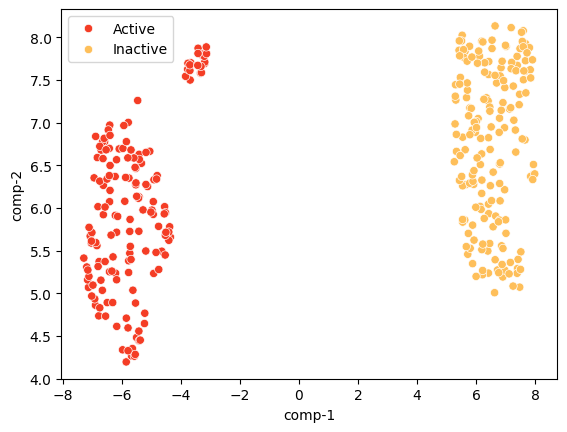

In [17]:
#after clean umap
X=X_new
y=y_new
embedding = umap.UMAP(n_neighbors=50).fit_transform(X, y=y) # two dimension
df = pd.DataFrame()
df["comp-1"] = embedding[:,0]
df["comp-2"] = embedding[:,1]
y_new_label=[]
for i in y:
    if i == 0:
        y_new_label.append('Inactive')
    if i == 1:
        y_new_label.append('Active')
df["y"] = y_new_label
graph = sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=y_new_label,
                palette='YlOrRd_r', legend='full')
graph_for_output = graph.get_figure()
graph_for_output.savefig('after_clean_UMAP.png', dpi=1000)
df.to_excel('after_clean_UMAP.xlsx')


## DeepLearning深度学习

In [22]:
#get data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,BatchNormalization,Dropout
from numpy import loadtxt
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
import keras

# 读取数据
data = X_new
# 将数据分为特征和标签
X = data.iloc[:, 0:].values
print(X.shape)
y = y_new
print(y.shape)


(339, 320)
(339,)


In [19]:
#CNN
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据预处理
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
input_shape = (X_train.shape[1], 1)

# 构建CNN模型
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.15))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1,validation_split=0.1)

# 在测试集上评估模型
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

mcc = matthews_corrcoef(y_test, y_pred_binary)
print("MCC:", mcc)

# 预测新的序列
#new_sequence = np.array([your_new_sequence])  # 替换成您的新序列数据
#new_sequence = new_sequence.reshape(1, new_sequence.shape[0], 1)
#prediction = model.predict(new_sequence)
#if prediction > 0.5:
   # print('新的序列具有抗氧化性')
#else:
   # print('新的序列没有抗氧化性')

Epoch 1/50
38/38 [==============================] - 1s 14ms/step - loss: 7.5983 - accuracy: 0.4901 - val_loss: 4.3273 - val_accuracy: 0.5000
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 4.7537 - val_accuracy: 0.5000
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 7.6797 - val_accuracy: 0.5000
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 7.6733 - val_accuracy: 0.5000
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 7.6707 - val_accuracy: 0.5000
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 7.6677 - accuracy: 0.4901 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 8/50
38/38 [=

ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

In [31]:
new_sequence_data = X_out # 替换成您的新序列数据文件
new_sequence = new_sequence_data.iloc[:, 0:].values
new_sequence = new_sequence.reshape(new_sequence.shape[0], new_sequence.shape[1], 1)
predictions = model.predict(new_sequence)
predictions_proba = predictions.flatten()
sorted_indices_CNN = np.argsort(predictions_proba)[::-1]

In [32]:
sorted_sequence_CNN = X_out_Sequence.iloc[sorted_indices_CNN]
sorted_proba_CNN = predictions_proba[sorted_indices_CNN]
output = np.column_stack((sorted_sequence_CNN, sorted_proba_CNN))

print("Sorted Sequence, Predictions, and Probabilities:")
print(output)

Sorted Sequence, Predictions, and Probabilities:
[['LWL' 0 1.0]
 ['LQSGDALRVPSGTTYY' 1 1.0]
 ['VHH' 1 1.0]
 ['VHHANEN' 1 1.0]
 ['VNPHDHQN' 1 1.0]
 ['LVNPHDHQN' 1 1.0]
 ['LLPHHADADY' 1 1.0]
 ['VIPAGYP' 1 1.0]
 ['AHK' 1 1.0]
 ['PP' 0 1.0]
 ['HLPLP' 0 1.0]
 ['VLPIPQ' 0 0.9335595965385437]
 ['SVPQPK' 0 1.921911518820707e-07]
 ['EVPKA' 0 1.1918875486571778e-07]
 ['LLNPT' 0 6.358715864962505e-08]
 ['PLAQPA' 0 6.124222551306957e-08]
 ['FSL' 0 4.531619879344362e-08]
 ['VKL' 1 5.731187191493348e-10]
 ['VVKL' 1 5.616606624236908e-10]
 ['IVF' 0 5.528474900096114e-10]]


In [23]:
#RNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
input_shape = (1, X_train.shape[2])

# 构建RNN模型
model = Sequential()
model = Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32,return_sequences = True))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))

monitor = EarlyStopping(monitor='val_loss',patience=5, verbose=1, mode='auto')

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=500, batch_size=8, verbose=1,callbacks=[monitor],validation_split=0.1)

# 在测试集上评估模型
y_pred = model.predict(X_test)
y_pred_proba = y_pred.flatten()
y_pred_binary = np.round(y_pred_proba)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)

mcc = matthews_corrcoef(y_test, y_pred_binary)
print("MCC:", mcc)





Epoch 1/500
31/31 [==============================] - 4s 35ms/step - loss: 0.6893 - binary_accuracy: 0.5597 - val_loss: 0.6812 - val_binary_accuracy: 0.5357
Epoch 2/500
31/31 [==============================] - 0s 11ms/step - loss: 0.5971 - binary_accuracy: 0.7243 - val_loss: 0.4377 - val_binary_accuracy: 0.8214
Epoch 3/500
31/31 [==============================] - 0s 10ms/step - loss: 0.2984 - binary_accuracy: 0.8889 - val_loss: 0.1849 - val_binary_accuracy: 0.8929
Epoch 4/500
31/31 [==============================] - 0s 10ms/step - loss: 0.2282 - binary_accuracy: 0.9300 - val_loss: 0.1629 - val_binary_accuracy: 0.9286
Epoch 5/500
31/31 [==============================] - 0s 9ms/step - loss: 0.2309 - binary_accuracy: 0.9095 - val_loss: 0.3037 - val_binary_accuracy: 0.8571
Epoch 6/500
31/31 [==============================] - 0s 9ms/step - loss: 0.1629 - binary_accuracy: 0.9506 - val_loss: 0.1450 - val_binary_accuracy: 0.9286
Epoch 7/500
31/31 [==============================] - 0s 9ms/step -

In [9]:
model_path = 'skin.h5'
model.save(model_path)


In [25]:
# 预测新的序列
new_sequence_data = X_out  # 替换成您的新序列数据文件
new_sequence = new_sequence_data.iloc[:, 0:].values
new_sequence = new_sequence.reshape(new_sequence.shape[0], 1, new_sequence.shape[1])
predictions = model.predict(new_sequence)
predictions_proba = predictions.flatten()
sorted_indices = np.argsort(predictions_proba)[::-1]

sorted_indices_RNN = np.argsort(predictions_proba)[::-1]
sorted_sequence_RNN = X_out_Sequence.iloc[sorted_indices_RNN]
sorted_proba_RNN = predictions_proba[sorted_indices_RNN]
output = np.column_stack((sorted_sequence_RNN, sorted_proba_RNN))

print("Sorted Sequence, Predictions, and Probabilities:")
print(output)

Sorted Sequence, Predictions, and Probabilities:
[['HLPLP' 0 1.0]
 ['LQSGDALRVPSGTTYY' 1 1.0]
 ['LLPHHADADY' 1 1.0]
 ['LVNPHDHQN' 1 1.0]
 ['VNPHDHQN' 1 1.0]
 ['VHHANEN' 1 1.0]
 ['VHH' 1 1.0]
 ['AHK' 1 1.0]
 ['VLPIPQ' 0 0.02283494919538498]
 ['SVPQPK' 0 9.812758605676208e-08]
 ['VVKL' 1 7.661884460219426e-09]
 ['EVPKA' 0 4.805029707455333e-09]
 ['PLAQPA' 0 3.7031375743623585e-09]
 ['LLNPT' 0 1.0773045788781133e-09]
 ['FSL' 0 4.860063462786002e-10]
 ['IVF' 0 3.1987146265066713e-10]]
